   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.7 MB/s eta 0:00:00
--- INICIANDO ANÁLISE DE SENTIMENTO (VADER) ---
Lendo 20 manchetes...

--- Resultado da Análise ---
                                              Titulo  Sentimento_Score  \
0  Bitcoin, XRP Prices Rise. Why This ‘Big Week f...            0.2263   
1  Bitcoin price rallies as BlackRock drives fres...            0.3182   
2   Is Bitcoin About to Break Out? - The Motley Fool           -0.4404   
3  Bitcoin price news: slips to nearly $95,000 as...           -0.2023   
4  Bitcoin price breakout: BTC clears $94,700 res...            0.0772   

  Classificacao  
0      Positivo  
1      Positivo  
2      Negativo  
3      Negativo  
4      Positivo  


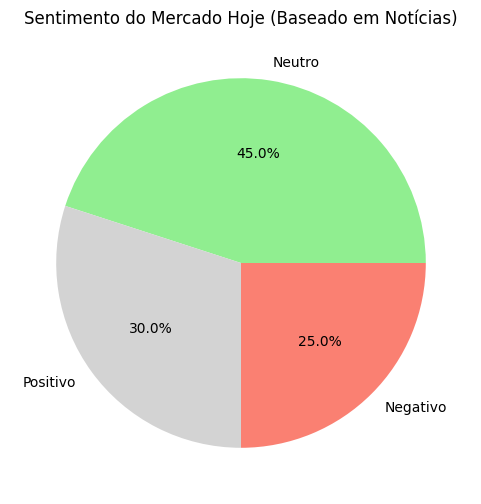


Sucesso! Arquivo 'noticias_com_sentimento.csv' gerado.


In [1]:
# 1. Instalar a biblioteca VADER (ferramenta de sentimento)
!pip install vaderSentiment -q

import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

def calcular_sentimento():
    print("--- INICIANDO ANÁLISE DE SENTIMENTO (VADER) ---")

    # Carregar as notícias que acabaste de baixar
    arquivo_noticias = 'noticias_bitcoin.csv'

    try:
        df = pd.read_csv(arquivo_noticias, sep=';')
        print(f"Lendo {len(df)} manchetes...")

        # Inicializar o analisador
        analyzer = SentimentIntensityAnalyzer()

        # Função para pegar a nota (Compound Score)
        # Retorna entre -1 (Muito Negativo) e +1 (Muito Positivo)
        def pegar_score(texto):
            return analyzer.polarity_scores(str(texto))['compound']

        # Aplicar a função em cada título
        df['Sentimento_Score'] = df['Titulo'].apply(pegar_score)

        # Classificar em palavras para ficar bonito na tabela
        def classificar(score):
            if score >= 0.05: return 'Positivo'
            elif score <= -0.05: return 'Negativo'
            else: return 'Neutro'

        df['Classificacao'] = df['Sentimento_Score'].apply(classificar)

        # Salvar o arquivo final desta fase
        df.to_csv('noticias_com_sentimento.csv', index=False, sep=';')

        print("\n--- Resultado da Análise ---")
        print(df[['Titulo', 'Sentimento_Score', 'Classificacao']].head())

        # Visualização rápida (Gráfico de Pizza)
        contagem = df['Classificacao'].value_counts()
        plt.figure(figsize=(6, 6))
        contagem.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightgray', 'salmon'])
        plt.title('Sentimento do Mercado Hoje (Baseado em Notícias)')
        plt.ylabel('')
        plt.show()

        print("\nSucesso! Arquivo 'noticias_com_sentimento.csv' gerado.")

    except FileNotFoundError:
        print("Erro: Rode o código de coleta de notícias anterior primeiro!")

if __name__ == "__main__":
    calcular_sentimento()